In [1]:
#Libraries for the experiments
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt #(matplotblib)
import seaborn as sns #(visualsize)

# pandas to handle the data matplotlib and  seaborn for visualization

In [23]:
data=pd.read_csv("Tweets.csv",encoding='utf_8_sig')
data[:3]

tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513           neutral                        1.0000   
1  570301130888122368          positive                        0.3486   
2  570301083672813571           neutral                        0.6837   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                        0.0  Virgin America   
2            NaN                        NaN  Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count  \
0                    NaN     cairdin                 NaN              0   
1                    NaN    jnardino                 NaN              0   
2                    NaN  yvonnalynn                 NaN              0   

                                                text tweet_coord  \
0                @VirginAmerica What @dhepburn said.         NaN   
1  @VirginAmerica plus you've added commercials t...         NaN   
2  @VirginAmerica I didn't today... Must mean I n...         NaN   

               tweet_created tweet_location               user_timezone  
0  2015-02-24 11:35:52 -0800            NaN  Eastern Time (US & Canada)  
1  2015-02-24 11:15:59 -0800            NaN  Pacific Time (US & Canada)  
2  2015-02-24 11:15:48 -0800      Lets Play  Central Time (US & Canada)

# Pre-processing

In [36]:
#Preprocessing of text tweets to remove : Punction, Numbers, stropwords hash tages , links stemming, lematization


import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
import re
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer() 

def preprocess(sentence):
    sentence=str(sentence)
    sentence = sentence.lower()
    sentence=sentence.replace('{html}',"") 
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url=re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)  
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]
    filtered_words1 = [w for w in filtered_words if len(w) > 2 if not w=="amp"]
    stem_words=[stemmer.stem(w) for w in filtered_words1]
    lemma_words=[lemmatizer.lemmatize(w) for w in stem_words]
    return " ".join(lemma_words)


data['cleanText']=data['text'].map(lambda s:preprocess(s)) 

# Emojis extraction methods

In [40]:
import emoji

def extract_emojis(s):
    return ''.join(c for c in s if c in emoji.UNICODE_EMOJI['en'])

In [68]:
for i in range (len(data)):
    a=extract_emojis(data['text'][i])
    print(i)
    print(a)

0

1

2

3

4

5

6

7

8

9

10

11

12

13

14

15

16

17

18
❤☺👍
19

20

21

22

23

24
😡
25

26

27

28

29

30
😢
31

32

33

34

35

36
💜✈
37

38

39

40

41

42
🍷👍💺✈
43

44

45

46

47

48

49

50

51

52

53

54

55

56

57
😊
58

59

60

61

62
😍👌
63

64

65

66

67

68

69

70

71

72

73

74

75

76

77

78

79

80

81

82

83

84

85

86

87

88

89

90

91

92

93

94

95

96

97

98

99

100

101

102

103

104

105
💕💕
106

107

108

109

110

111

112

113
🌞✈
114

115

116

117

118

119

120

121

122

123

124

125

126

127

128

129

130

131

132

133

134

135

136

137

138

139

140

141

142
😃
143

144

145

146

147

148

149

150

151

152

153

154

155

156

157

158

159

160

161

162

163

164

165

166

167

168

169

170

171

172

173

174

175

176

177

178

179

180
😩😭
181

182

183
😎
184

185

186

187

188

189

190
🙉
191

192

193

194

195

196
😁
197

198

199

200

201

202

203

204

205
❤
206

207

208

209

210

211
❄❄❄
212

213

214

215

21

In [46]:
for i in range (len(data)):
    a=extract_emojis(data['text'][i])
    if a is None:
        pass
    else:
        data['cleanText'][i]=data['cleanText'][i]+" "+a


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


# visualisation of dataset

### display the frequency of most used words in tweets

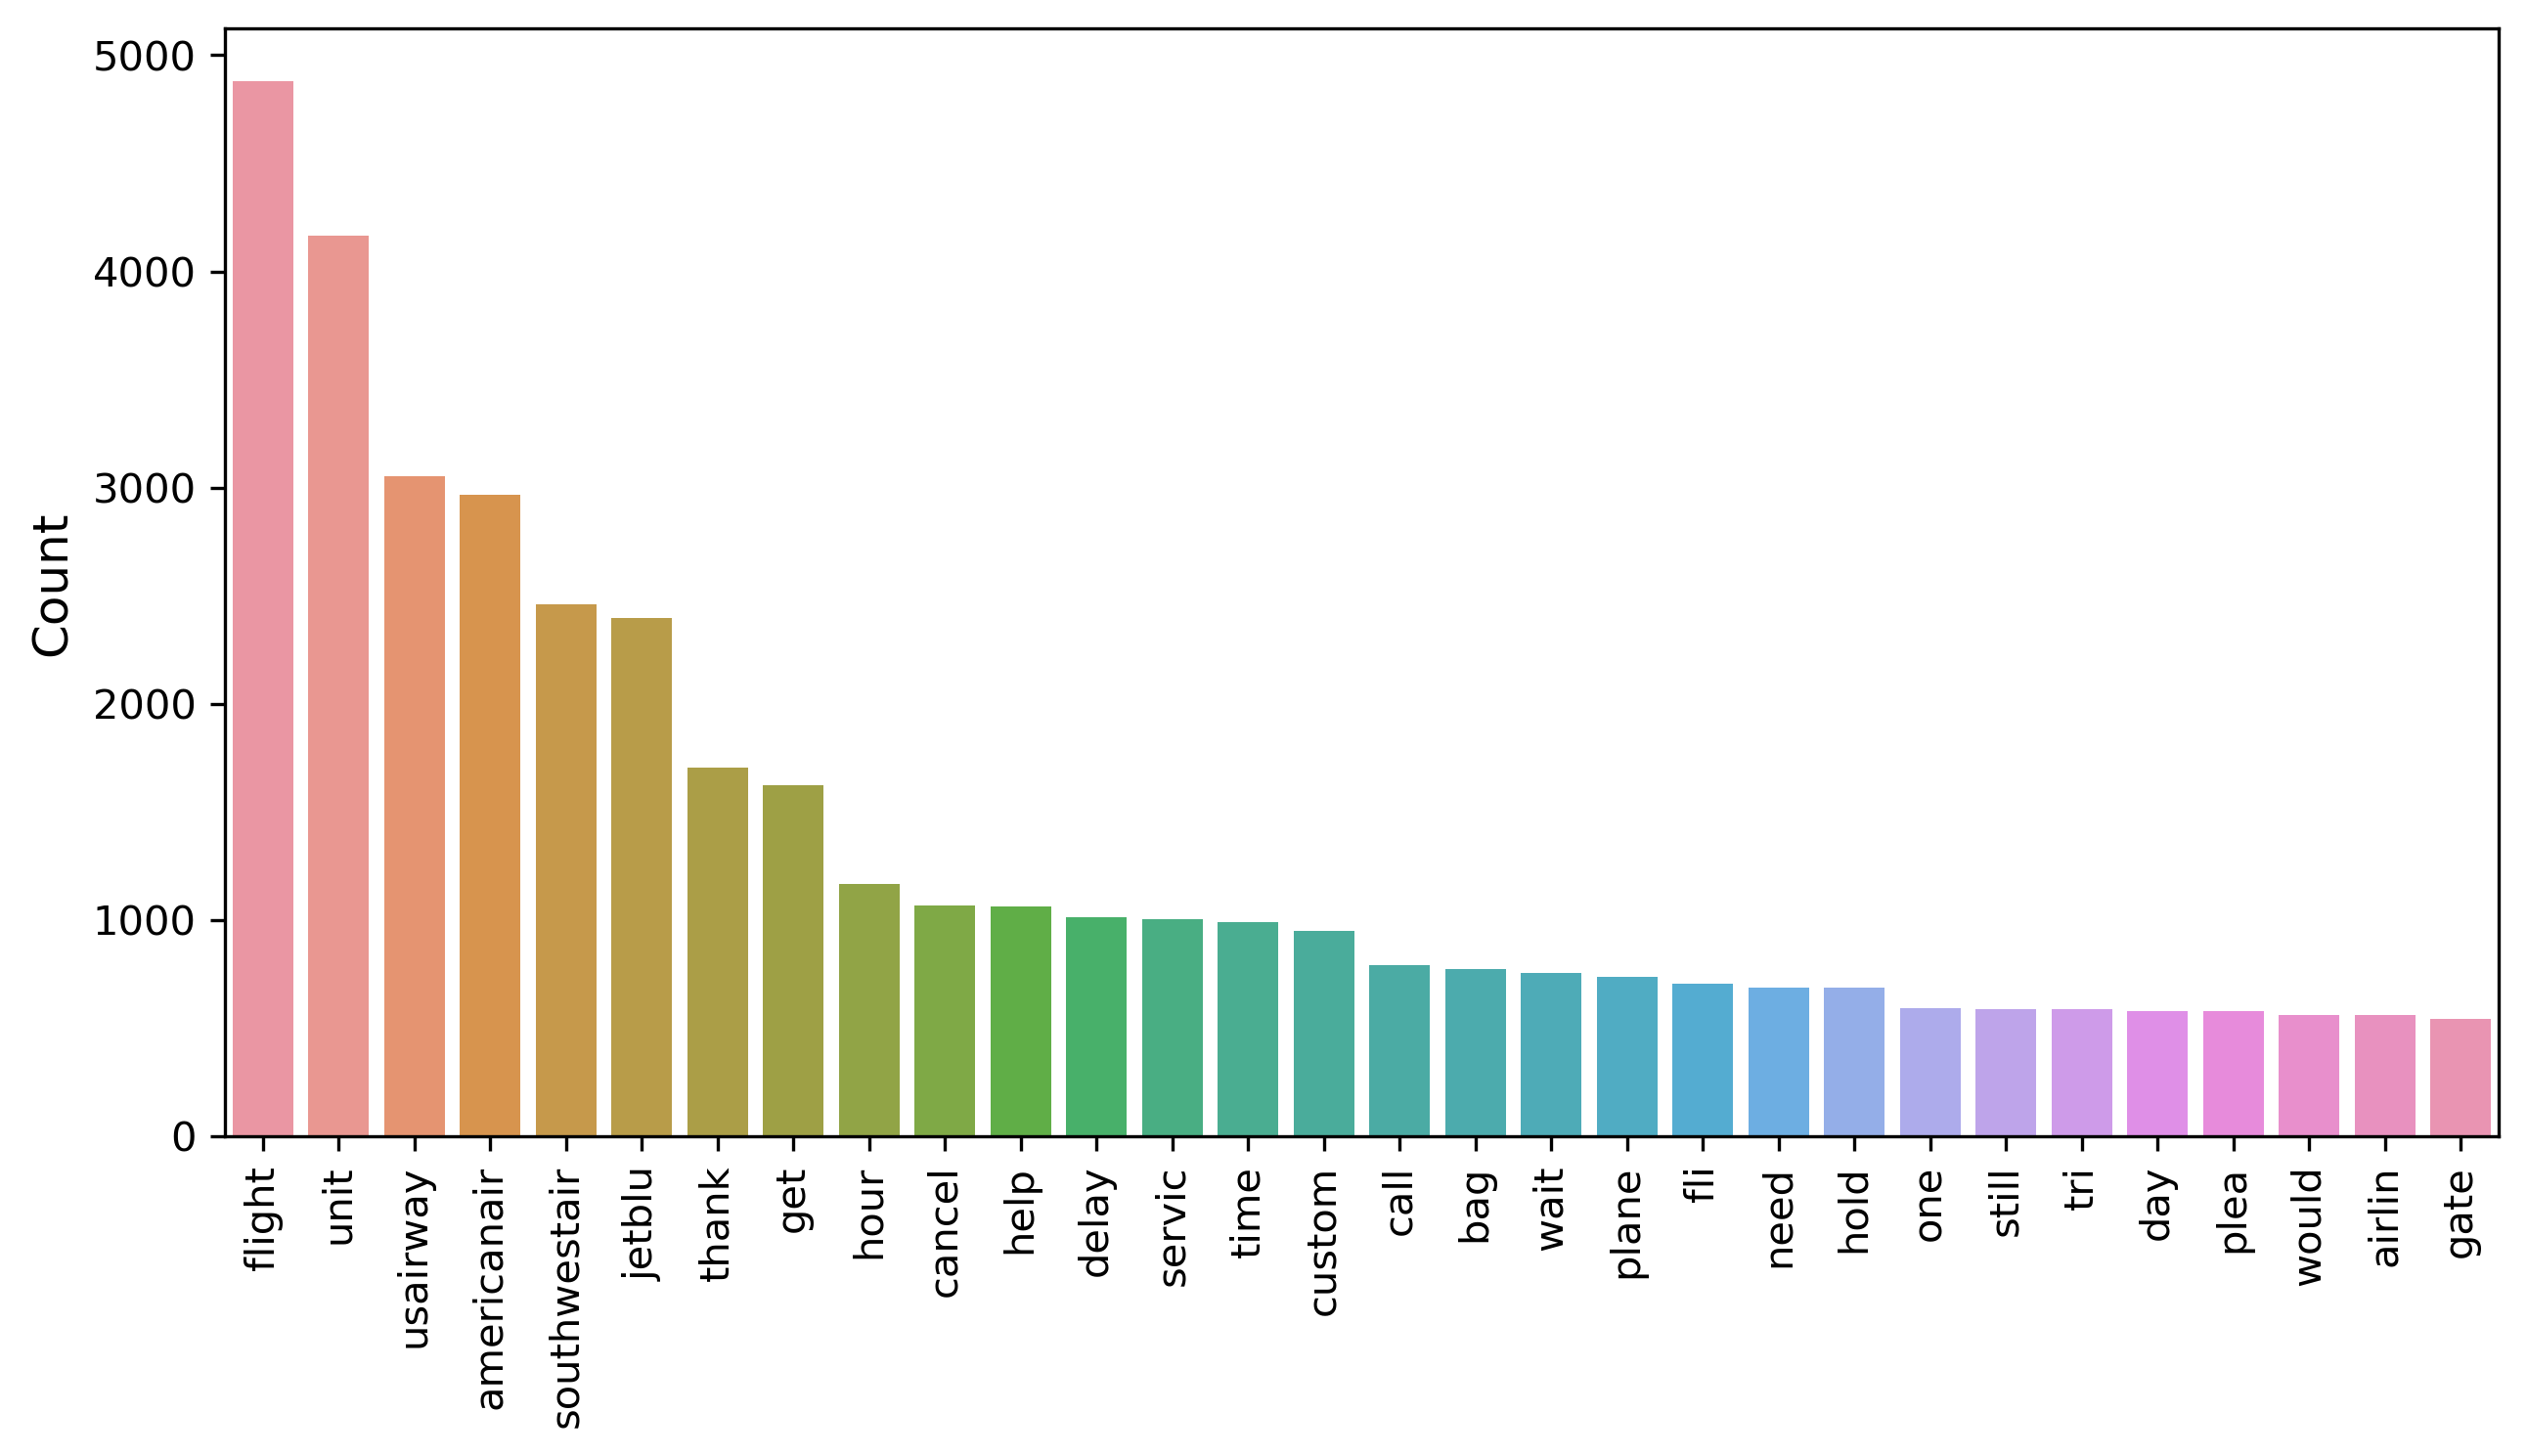

In [47]:


words = []
for i in range(0,len(data["cleanText"])):
    words = words + (re.findall(r'\w+', data["cleanText"][i]))# words cantain all the words in the dataset   

from collections import Counter
words_counts = Counter(words)

most_common_words = sorted(words_counts.items(), key=lambda x: x[1], reverse=True)
most_commmom_wordList = []
most_commmom_CountList = []
for x, y in most_common_words:
    most_commmom_wordList.append(x)
    most_commmom_CountList.append(y)
    
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.figure(figsize=(10,5),dpi=300)
plot = sns.barplot(np.arange(30), most_commmom_CountList[0:30]) #width=0.35)
plt.ylabel('Count',fontsize=12)
plt.xticks(np.arange(30), most_commmom_wordList[0:30], rotation=90)
#plt.title('Most Domain use to write paper.')
plt.show()

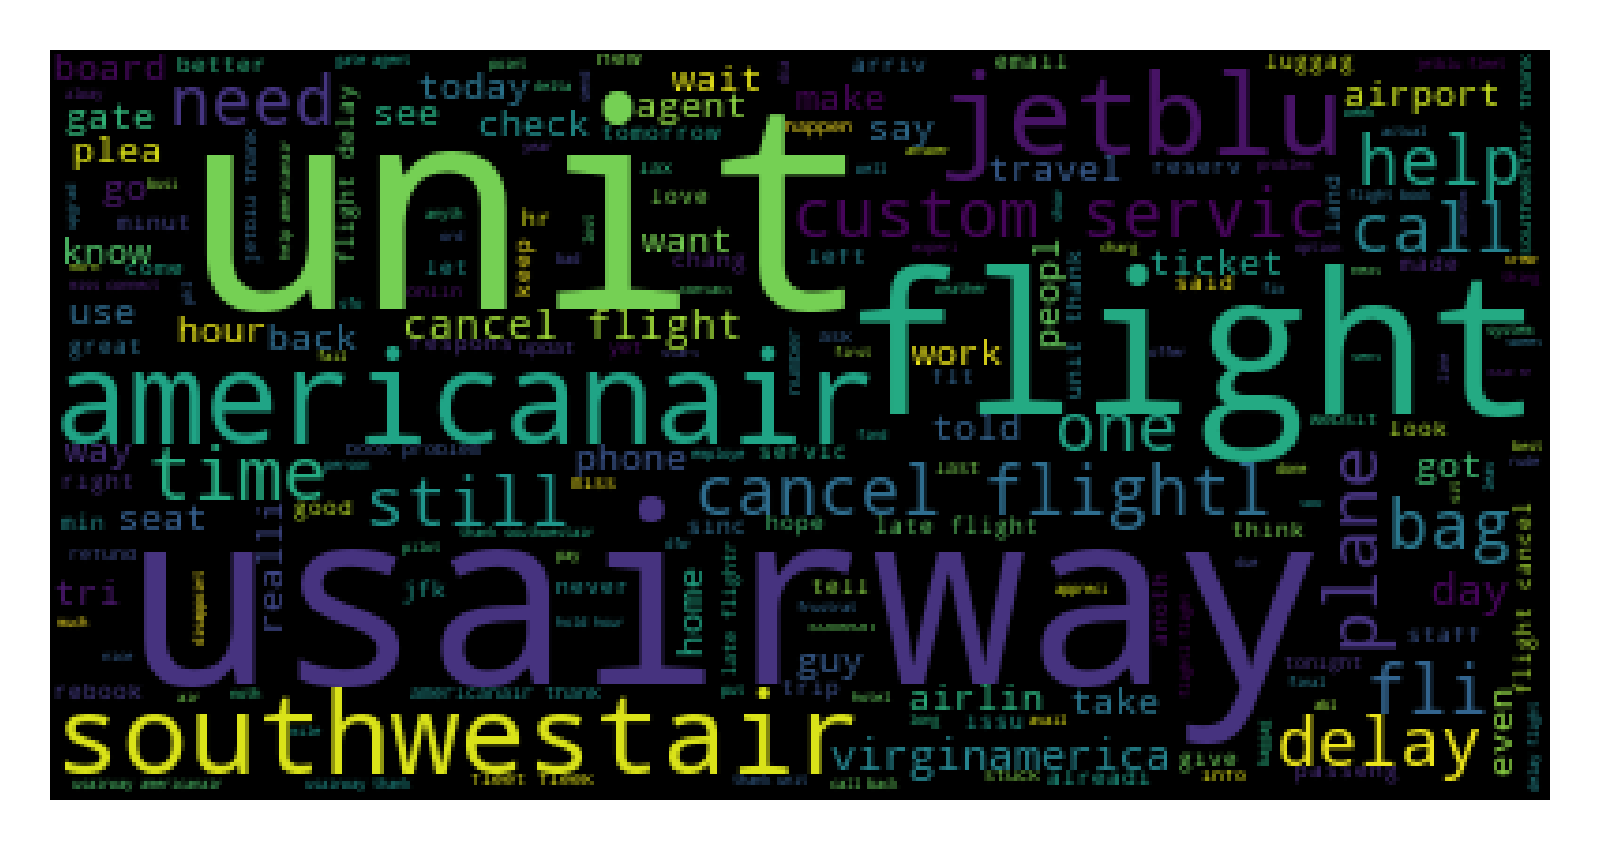

In [48]:
#wordcloud to see to most useable word to analyze the topics in tweets text
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 
wordcloud = WordCloud().generate(' '.join(data['cleanText']))
  
# plot the WordCloud image                        
plt.figure(figsize = (3, 3), facecolor = None, dpi=500) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

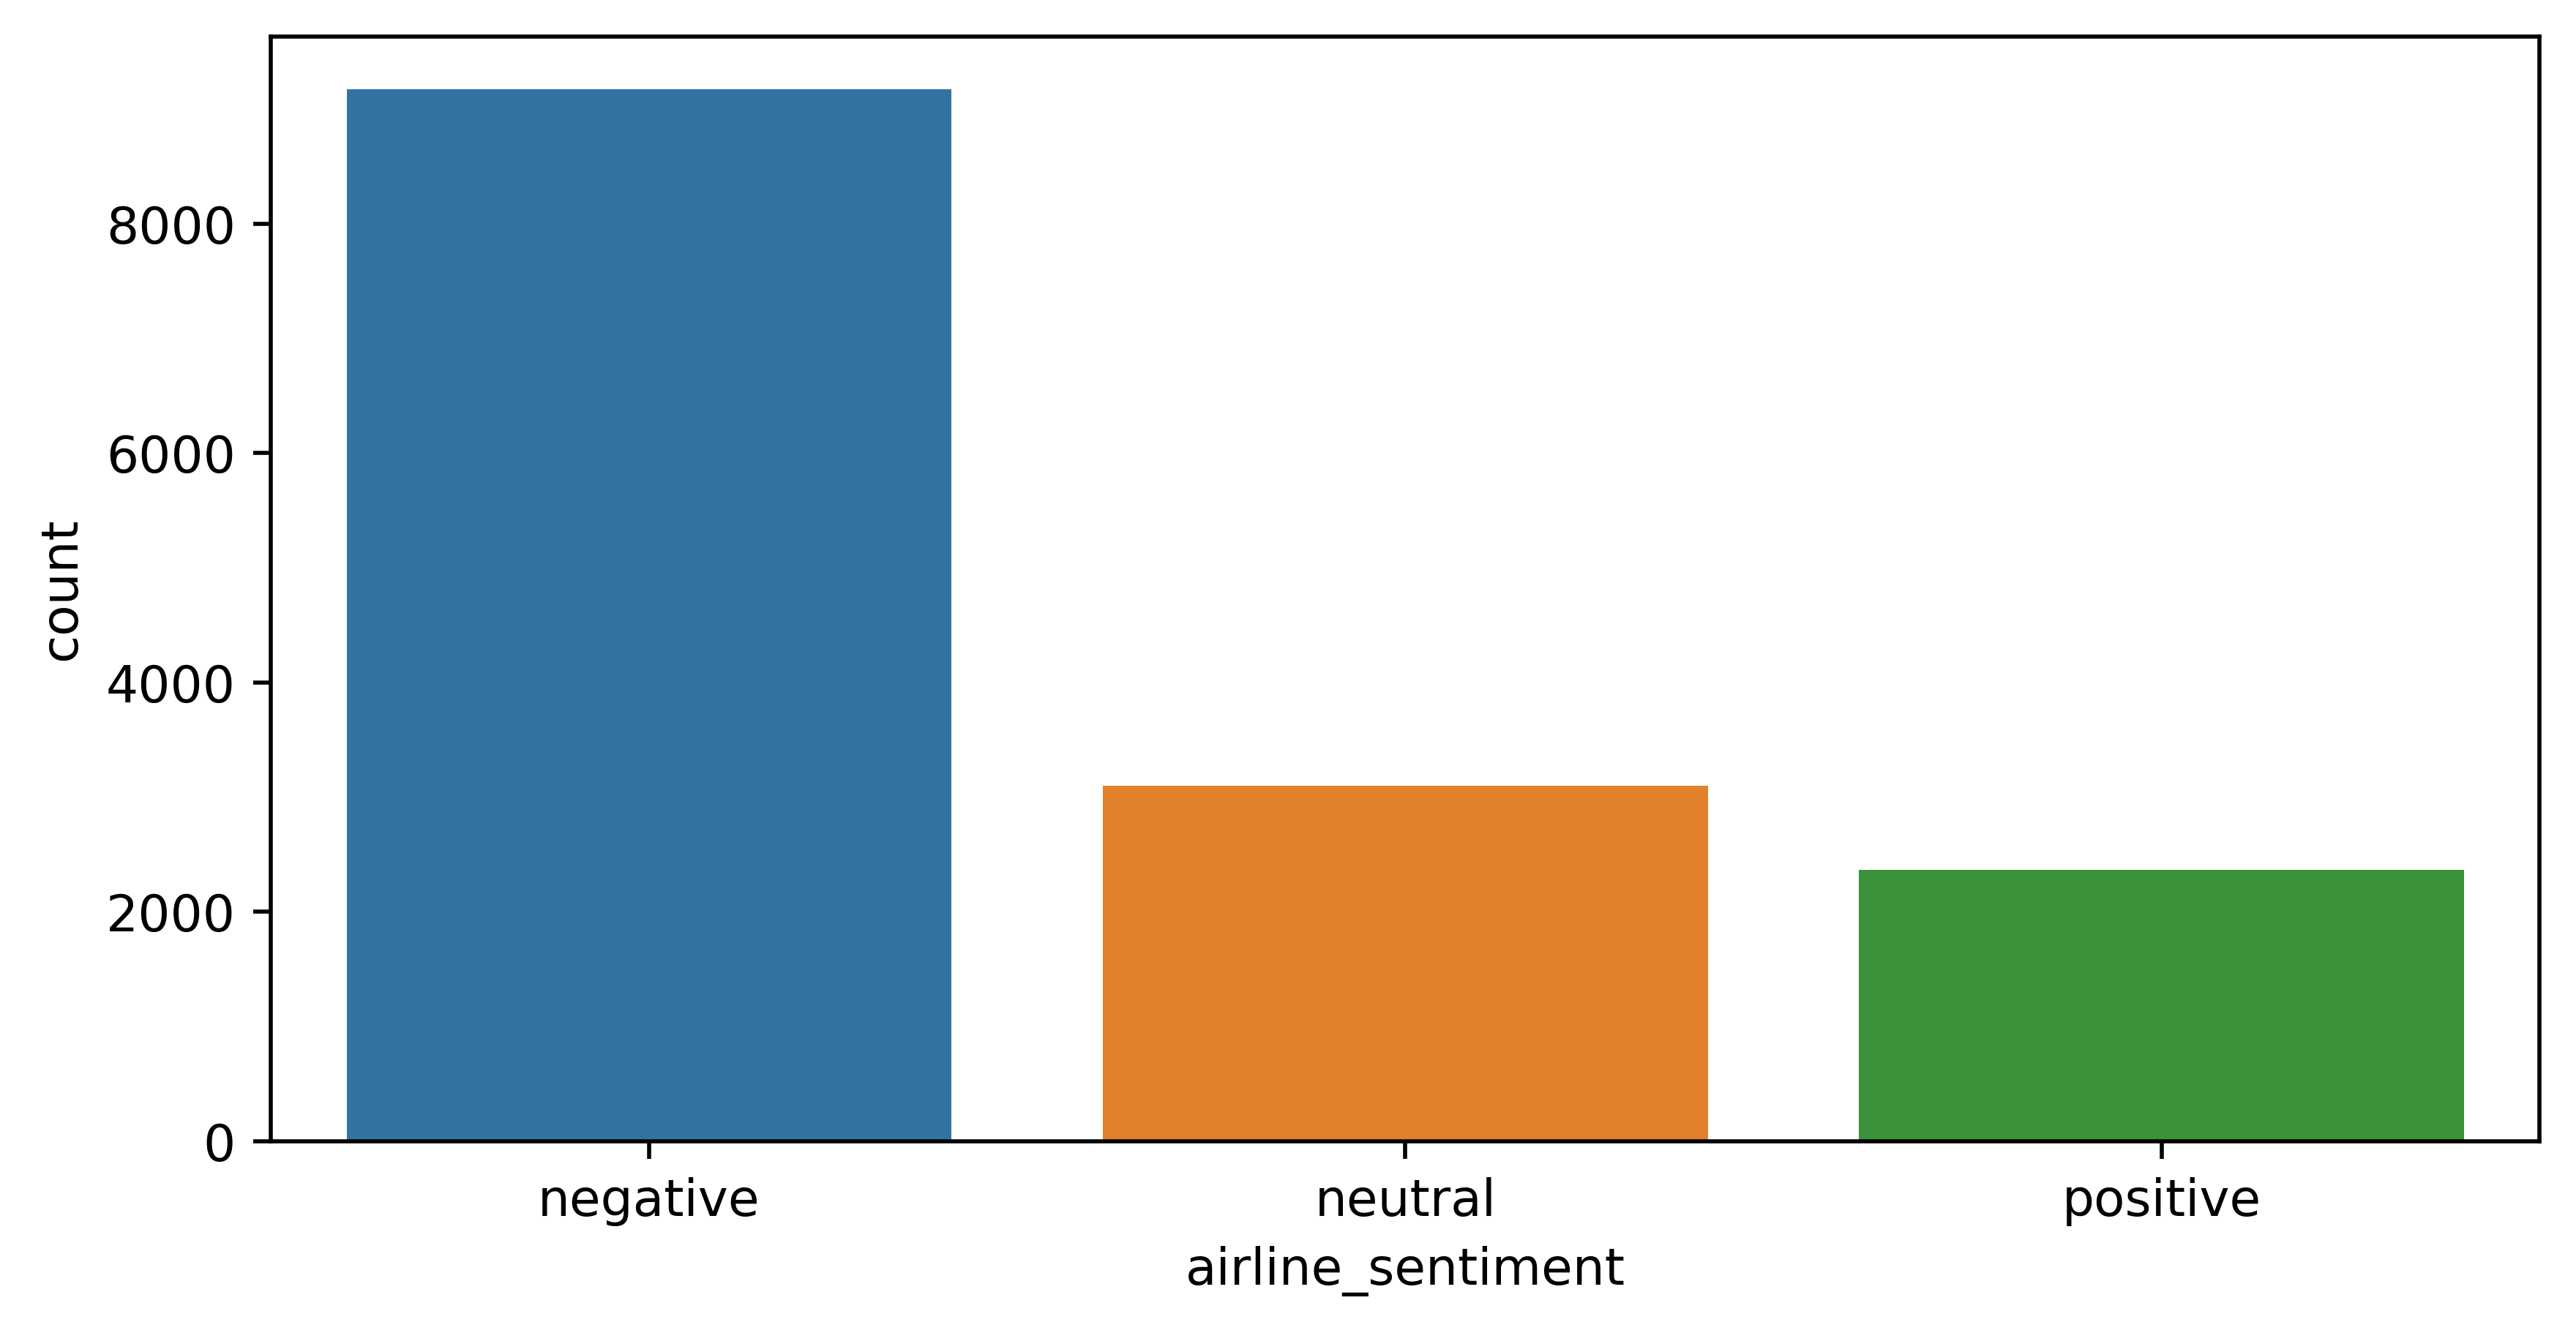

In [49]:
from matplotlib import pyplot
y = data["airline_sentiment"]         
fig, ax = pyplot.subplots(figsize=(8,4),dpi=500)
ax = sns.countplot(y,label="Count",ax=ax,order=data["airline_sentiment"].value_counts().iloc[:15].index )   
plt.savefig('fig3.png')

# Start Machine Learning 

In [50]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Data splitting

In [51]:
data["cleanText"]=data["cleanText"].astype(str)

In [52]:
#Data Splitting into training and testing sets for machine leanring models
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data["cleanText"],data['airline_sentiment'],test_size=0.25,shuffle=True)

In [53]:
#TF-IDF features 
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(X_train)
y = vectorizer.transform(X_test)

In [54]:
#BoW features 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=5000)
X1 = vectorizer.fit_transform(X_train)
y1 = vectorizer.transform(X_test)

# TF-IDF Results using several machine learning models

# Decision Tree Classifier



In [55]:
#Decsion tree machine leanirng models
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(max_depth=50)
dtPre=dt.fit(X, y_train).predict(y)
print(accuracy_score(y_test,dtPre))
print(classification_report(y_test,dtPre))
print(confusion_matrix(y_test,dtPre))

0.6967213114754098
              precision    recall  f1-score   support

    negative       0.77      0.85      0.81      2294
     neutral       0.47      0.39      0.43       777
    positive       0.60      0.52      0.56       589

    accuracy                           0.70      3660
   macro avg       0.62      0.59      0.60      3660
weighted avg       0.68      0.70      0.69      3660

[[1939  237  118]
 [ 389  306   82]
 [ 175  109  305]]


# Random Forest Classifier



In [56]:
#Random forest machine leanring models
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=300, random_state=2,max_depth=300) 
rfc.fit(X, y_train)
# calculate accuracy of class predictions
y_pred_class = rfc.predict(y)
print(accuracy_score(y_test, y_pred_class))
print(classification_report(y_test, y_pred_class))
print(confusion_matrix(y_test, y_pred_class))

0.7666666666666667
              precision    recall  f1-score   support

    negative       0.79      0.94      0.86      2294
     neutral       0.65      0.42      0.51       777
    positive       0.75      0.54      0.63       589

    accuracy                           0.77      3660
   macro avg       0.73      0.64      0.67      3660
weighted avg       0.75      0.77      0.75      3660

[[2158   95   41]
 [ 382  327   68]
 [ 188   80  321]]


# Support vector machine (SVM)



In [57]:
#support vector machine for machine leanring
from sklearn.svm import SVC
print("SVC")
svm = SVC(kernel='linear', C=1.0)
svm.fit(X, y_train)
y_pred_class = svm.predict(y)
print(accuracy_score(y_test, y_pred_class))
print(classification_report(y_test, y_pred_class))
print(confusion_matrix(y_test, y_pred_class))

SVC
0.7844262295081967
              precision    recall  f1-score   support

    negative       0.83      0.91      0.87      2294
     neutral       0.63      0.52      0.57       777
    positive       0.76      0.63      0.69       589

    accuracy                           0.78      3660
   macro avg       0.74      0.69      0.71      3660
weighted avg       0.78      0.78      0.78      3660

[[2096  145   53]
 [ 309  406   62]
 [ 128   92  369]]


# LogisticRegression



In [58]:
#Logistic regression for machine leanring
from sklearn.linear_model import LogisticRegression
Lr = LogisticRegression(solver="sag",multi_class="ovr",C=1.0)
Lr.fit(X, y_train)
y_pred_class = Lr.predict(y)
print(accuracy_score(y_test, y_pred_class))
print(classification_report(y_test, y_pred_class))
print(confusion_matrix(y_test, y_pred_class))

0.7778688524590164
              precision    recall  f1-score   support

    negative       0.80      0.95      0.87      2294
     neutral       0.67      0.43      0.52       777
    positive       0.78      0.57      0.66       589

    accuracy                           0.78      3660
   macro avg       0.75      0.65      0.68      3660
weighted avg       0.77      0.78      0.76      3660

[[2175   85   34]
 [ 380  334   63]
 [ 168   83  338]]


# BoW Results using several machine learning models

# Decision Tree Classifier

In [59]:
#Decsion tree machine leanirng models
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(max_depth=50)
dtPre=dt.fit(X1, y_train).predict(y1)
print(accuracy_score(y_test,dtPre))
print(classification_report(y_test,dtPre))
print(confusion_matrix(y_test,dtPre))

0.6926229508196722
              precision    recall  f1-score   support

    negative       0.78      0.82      0.80      2294
     neutral       0.45      0.43      0.44       777
    positive       0.62      0.52      0.57       589

    accuracy                           0.69      3660
   macro avg       0.62      0.59      0.60      3660
weighted avg       0.69      0.69      0.69      3660

[[1889  291  114]
 [ 365  337   75]
 [ 161  119  309]]


# Random Forest Classifier

In [60]:
#Random forest machine leanring models
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=300, random_state=2,max_depth=300) 
rfc.fit(X1, y_train)
# calculate accuracy of class predictions
y_pred_class = rfc.predict(y1)
print(accuracy_score(y_test, y_pred_class))
print(classification_report(y_test, y_pred_class))
print(confusion_matrix(y_test, y_pred_class))

0.764207650273224
              precision    recall  f1-score   support

    negative       0.81      0.91      0.86      2294
     neutral       0.60      0.45      0.52       777
    positive       0.72      0.59      0.65       589

    accuracy                           0.76      3660
   macro avg       0.71      0.65      0.68      3660
weighted avg       0.75      0.76      0.75      3660

[[2095  146   53]
 [ 339  352   86]
 [ 155   84  350]]


# Support vector machine (SVM)

In [61]:
#support vector machine for machine leanring
from sklearn.svm import SVC
print("SVC")
svm = SVC(kernel='linear', C=1.0)
svm.fit(X1, y_train)
y_pred_class = svm.predict(y1)
print(accuracy_score(y_test, y_pred_class))
print(classification_report(y_test, y_pred_class))
print(confusion_matrix(y_test, y_pred_class))

SVC
0.7658469945355191
              precision    recall  f1-score   support

    negative       0.85      0.86      0.85      2294
     neutral       0.57      0.58      0.57       777
    positive       0.70      0.66      0.68       589

    accuracy                           0.77      3660
   macro avg       0.71      0.70      0.70      3660
weighted avg       0.76      0.77      0.77      3660

[[1970  236   88]
 [ 254  447   76]
 [ 105   98  386]]


# Logistic Regression

In [62]:
#Logistic regression for machine leanring
from sklearn.linear_model import LogisticRegression
Lr = LogisticRegression(solver="sag",multi_class="ovr",C=1.0)
Lr.fit(X1, y_train)
y_pred_class = Lr.predict(y1)
print(accuracy_score(y_test, y_pred_class))
print(classification_report(y_test, y_pred_class))
print(confusion_matrix(y_test, y_pred_class))

C:\Users\Sohail_Comp\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Sohail_Comp\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Sohail_Comp\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


0.7844262295081967
              precision    recall  f1-score   support

    negative       0.84      0.90      0.87      2294
     neutral       0.62      0.55      0.58       777
    positive       0.73      0.66      0.69       589

    accuracy                           0.78      3660
   macro avg       0.73      0.70      0.71      3660
weighted avg       0.78      0.78      0.78      3660

[[2057  164   73]
 [ 281  425   71]
 [ 104   96  389]]


# Deep learning models LSTM results

In [63]:
import numpy as np # linear algebra

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
import glob
import cv2
import tensorflow as tf
from keras import layers
from keras.layers import Dropout , Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from keras.models import Model, load_model
from keras.initializers import glorot_uniform
from sklearn.model_selection import train_test_split
import keras.backend as K
from sklearn.utils import shuffle
# importing all necessary libraries to run the code
import re,string
import numpy as np
import pandas as pd
import keras_metrics
import tensorflow.keras
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Flatten, LSTM, Conv1D, MaxPooling1D, Dropout, Activation,Embedding
# using the variable sw to hold all stopwords that are in English
sw = stopwords.words('english')

In [64]:
from keras import optimizers
import tensorflow.keras
tokenizer = tensorflow.keras.preprocessing.text.Tokenizer(num_words=5000, lower=True,split=' ',filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n')
tokenizer.fit_on_texts(data["cleanText"].values)
#print(tokenizer.word_index)  # To see the dicstionary
X = tokenizer.texts_to_sequences(data["cleanText"].values)
X = tensorflow.keras.preprocessing.sequence.pad_sequences(X)
#Deep Learning Network Structure
model_conv = Sequential()
model_conv.add(Embedding(5000,100, input_length=X.shape[1]))
model_conv.add(Dropout(0.5))
model_conv.add(LSTM(100))
model_conv.add(Dense(3, activation='softmax'))
model_conv.compile(loss='categorical_crossentropy', optimizer='adam',   metrics=['accuracy','mae','mse',keras_metrics.precision(), keras_metrics.recall(),keras_metrics.f1_score()])
#Y = data.Reviewer_Score
Y = pd.get_dummies(data['airline_sentiment']).values

X_train, X_valid, Y_train, Y_valid = train_test_split(X,Y, test_size = 0.25, random_state =2)
batch_size=128
#Here we train the Network.

pred=model_conv.fit(X_train, Y_train, batch_size =batch_size, epochs =100, verbose =2,validation_data=(X_valid,Y_valid))
pred

Epoch 1/100


C:\Users\Sohail_Comp\AppData\Roaming\Python\Python37\site-packages\keras\engine\base_layer.py:1307: UserWarning: `layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`layer.updates` will be removed in a future version. '


86/86 - 19s - loss: 0.7968 - accuracy: 0.6603 - mae: 0.3146 - mse: 0.1540 - precision: 0.6161 - recall: 0.6068 - f1_score: 0.6039 - val_loss: 0.6610 - val_accuracy: 0.7238 - val_mae: 0.2626 - val_mse: 0.1265 - val_precision: 0.7542 - val_recall: 0.8137 - val_f1_score: 0.7828
Epoch 2/100
86/86 - 6s - loss: 0.5555 - accuracy: 0.7790 - mae: 0.2204 - mse: 0.1058 - precision: 0.7884 - recall: 0.8439 - f1_score: 0.8152 - val_loss: 0.5567 - val_accuracy: 0.7743 - val_mae: 0.2209 - val_mse: 0.1061 - val_precision: 0.8097 - val_recall: 0.8550 - val_f1_score: 0.8317
Epoch 3/100
86/86 - 6s - loss: 0.4436 - accuracy: 0.8223 - mae: 0.1756 - mse: 0.0843 - precision: 0.8243 - recall: 0.8631 - f1_score: 0.8433 - val_loss: 0.5467 - val_accuracy: 0.7798 - val_mae: 0.1882 - val_mse: 0.1027 - val_precision: 0.8347 - val_recall: 0.8676 - val_f1_score: 0.8508
Epoch 4/100
86/86 - 7s - loss: 0.3748 - accuracy: 0.8545 - mae: 0.1470 - mse: 0.0710 - precision: 0.8442 - recall: 0.8726 - f1_score: 0.8582 - val_los

In [66]:
rounded_predictions = model_conv.predict_classes(X_valid, batch_size=128, verbose=0)
rounded_labels=np.argmax(Y_valid, axis=1)
print(classification_report(rounded_labels,rounded_predictions))
print(confusion_matrix(rounded_labels,rounded_predictions))

C:\Users\Sohail_Comp\AppData\Roaming\Python\Python37\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


              precision    recall  f1-score   support

           0       0.82      0.85      0.83      2254
           1       0.54      0.50      0.52       798
           2       0.66      0.63      0.65       608

    accuracy                           0.74      3660
   macro avg       0.67      0.66      0.66      3660
weighted avg       0.73      0.74      0.73      3660

[[1913  241  100]
 [ 305  397   96]
 [ 125  100  383]]
